C:\Users\evol0\AppData\Local\Temp\ipykernel_15676\3857356726.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morning_commute_data['연도_월'] = pd.to_datetime(morning_commute_data['기준_날짜']).dt.to_period('M')
C:\Users\evol0\AppData\Local\Temp\ipykernel_15676\3857356726.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evening_commute_data['연도_월'] = pd.to_datetime(evening_commute_data['기준_날짜']).dt.to_period('M')


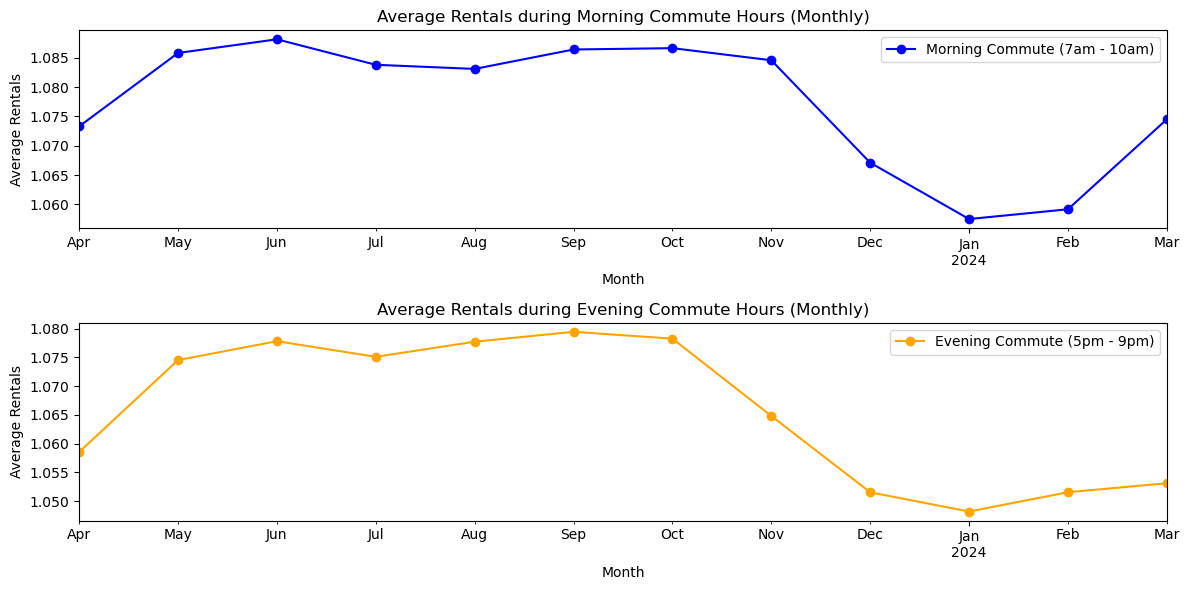

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일을 읽기
df = pd.read_csv('강서_따릉이0102.csv')

# 시간과 분으로 분리하여 시간으로 변환
df['대여_시간'] = df['기준_시간대'] // 100  # 시간 추출
df['대여_분'] = df['기준_시간대'] % 100    # 분 추출

# 출근 시간대와 퇴근 시간대의 데이터 추출
morning_commute_data = df[(df['대여_시간'] >= 7) & (df['대여_시간'] < 10)]
evening_commute_data = df[(df['대여_시간'] >= 17) & (df['대여_시간'] < 21)]

# 연도와 월 정보를 추출하여 새로운 열 생성
morning_commute_data['연도_월'] = pd.to_datetime(morning_commute_data['기준_날짜']).dt.to_period('M')
evening_commute_data['연도_월'] = pd.to_datetime(evening_commute_data['기준_날짜']).dt.to_period('M')

# 출근 시간대와 퇴근 시간대의 월별 평균 대여량 계산
avg_morning_rentals_monthly = morning_commute_data.groupby('연도_월')['전체_건수'].mean()
avg_evening_rentals_monthly = evening_commute_data.groupby('연도_월')['전체_건수'].mean()

# 그래프 그리기
plt.figure(figsize=(12, 6))

# 출근 시간대 월별 그래프
plt.subplot(2, 1, 1)
avg_morning_rentals_monthly.plot(kind='line', marker='o', color='blue', label='Morning Commute (7am - 10am)')
plt.title('Average Rentals during Morning Commute Hours (Monthly)')
plt.xlabel('Month')
plt.ylabel('Average Rentals')
plt.legend()


# 퇴근 시간대 월별 그래프
plt.subplot(2, 1, 2)
avg_evening_rentals_monthly.plot(kind='line', marker='o', color='orange', label='Evening Commute (5pm - 9pm)')
plt.title('Average Rentals during Evening Commute Hours (Monthly)')
plt.xlabel('Month')
plt.ylabel('Average Rentals')
plt.legend()

plt.tight_layout()
plt.show()